Librerias

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import math
import json

# Pre procesado de audio de datos, ejemplo con Ale.001

In [1]:
file="Raw/Ale/Ale.001.wav"

Waveform

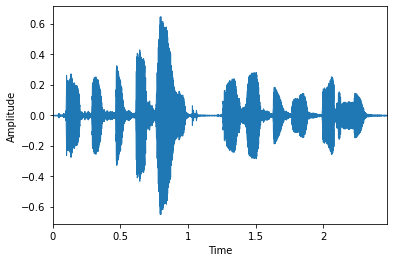

In [4]:
signal, sr = librosa.load(file,sr=22050) #sr * T = 22050 * 3
librosa.display.waveplot(signal,sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

FFT

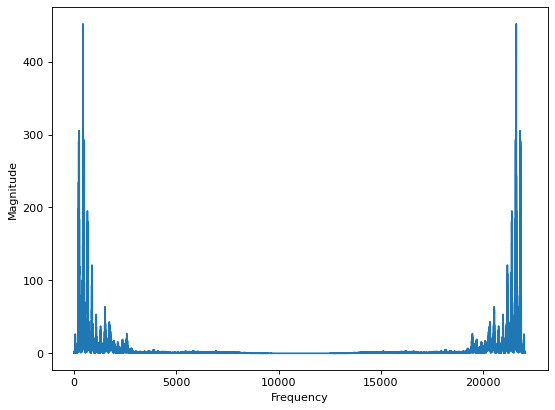

In [10]:
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

figure(figsize=(8, 6), dpi=80)
plt.plot(frequency,magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

* La mayoria de la energia se concentra en frecuencias bajas, presenta simetria, por lo cual nos quedamos con la primera mitad del espectro

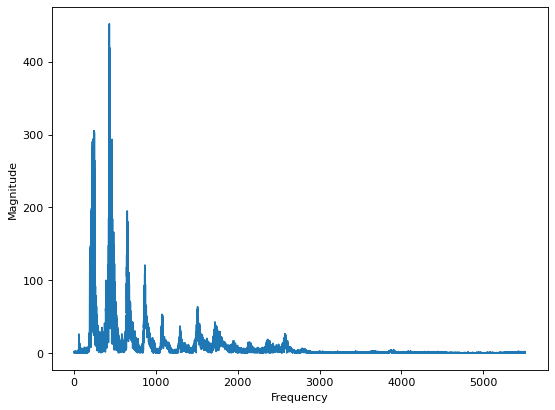

In [13]:

left_frequency=frequency[:int(len(frequency)/4)]
left_magnitude=magnitude[:int(len(magnitude)/4)]

figure(figsize=(8, 6), dpi=80) #Aumentar tamaño de la imagen
plt.plot(left_frequency,left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

stft=> spectograma

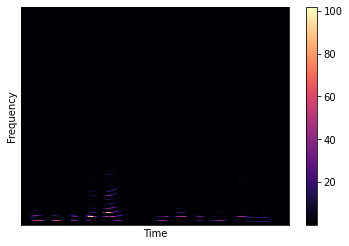

In [17]:
n_fft = 2048 
hop_length = 512

stft = librosa.core.stft(signal, hop_length= hop_length, n_fft=n_fft)
spectrogram = np.abs(stft) #de complejos a magnitud

librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

* La mayoria de las frec. tienen muy baja amplitud por lo que contribuyen poco en sonido

Log espectograma

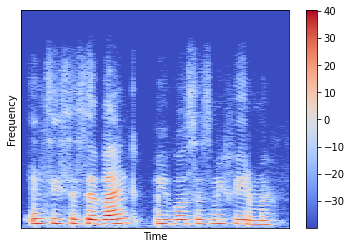

In [18]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

* Azul= sonidos muy silenciosos
* Rojo= la mayoria de la energia esta presentada en bajas frecuencias

MFCCs

* Para extraer mfccs es necesario obtener short time fourier transform

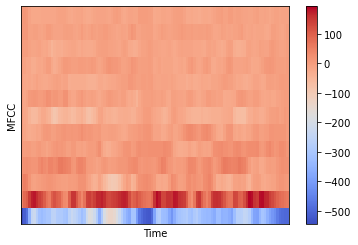

In [19]:
MFCCs= librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

* Cada linea o cuadricula es una caracteristica

# Clasificador de audio: Preparando el dataset

Función para guardar las caracteristicas mfcc

* Audio path = ubicacion de los audios raw
* json_path = ubicación donde se guardará el dataset
* num_segments = segmentos en los que se dividirá cada audio
* dirpath = direccion de la carpeta de audios
* dirnames = nombre de las subcarpetas
* filenames = nonmbre de los archivos en esas carpetas

In [24]:
AUDIO_PATH = "Raw/"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
DURATION = 2.7 #segundos
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [25]:
def save_mfcc(Audio_path,json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    #diccionario para almacenar la info// nombres= mapping; labels= 0, 0, 1
    data={
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 

    # Buscar y analizar cada audio en las carpetas
    for i,(dirpath,dirnames,filenames) in enumerate(os.walk(Audio_path)):
        
        # asegurarnos que no estamos en el nivel raiz
        if dirpath is not Audio_path:
            
            # guardar labels semanticas
            dirpath_components = dirpath.split("/") # Raw/nombre => ["Raw", "nombre"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\n Processing {}".format(semantic_label))

            #Procesamos los archivos para un nombre especifico
            for f in filenames:
                # cargar los archivos de audio
                filepath = os.path.join(dirpath,f)
                signal, sr = librosa.load(filepath, sr=SAMPLE_RATE)

                #procesar segmentos de extraccion mfcc y almacenamiento de los datos
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s # s=0->0
                    finish_sample = start_sample + num_samples_per_segment # s=0 -> num_samples_per_segment
                    
                    mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample] ,sr=sr, n_fft=n_fft, n_mfcc=n_mfcc, hop_length=hop_length)
                    mfcc = mfcc.T
                    # almacenar mfcc por segmento si tiene la longitud esperada
                    if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(filepath, s+1))

    with open(json_path,"w") as fp:
        json.dump(data, fp, indent=4)

if __name__ == "__main__":
    save_mfcc(AUDIO_PATH, JSON_PATH,num_segments=10)


 Processing Ale
Raw/Ale\Ale.001.wav, segment:1
Raw/Ale\Ale.001.wav, segment:2
Raw/Ale\Ale.001.wav, segment:3
Raw/Ale\Ale.001.wav, segment:4
Raw/Ale\Ale.001.wav, segment:5
Raw/Ale\Ale.001.wav, segment:6
Raw/Ale\Ale.001.wav, segment:7
Raw/Ale\Ale.001.wav, segment:8
Raw/Ale\Ale.001.wav, segment:9
Raw/Ale\Ale.002.wav, segment:1
Raw/Ale\Ale.002.wav, segment:2
Raw/Ale\Ale.002.wav, segment:3
Raw/Ale\Ale.002.wav, segment:4
Raw/Ale\Ale.002.wav, segment:5
Raw/Ale\Ale.002.wav, segment:6
Raw/Ale\Ale.002.wav, segment:7
Raw/Ale\Ale.002.wav, segment:8
Raw/Ale\Ale.002.wav, segment:9
Raw/Ale\Ale.002.wav, segment:10
Raw/Ale\Ale.003.wav, segment:1
Raw/Ale\Ale.003.wav, segment:2
Raw/Ale\Ale.003.wav, segment:3
Raw/Ale\Ale.003.wav, segment:4
Raw/Ale\Ale.003.wav, segment:5
Raw/Ale\Ale.003.wav, segment:6
Raw/Ale\Ale.003.wav, segment:7
Raw/Ale\Ale.003.wav, segment:8
Raw/Ale\Ale.003.wav, segment:9
Raw/Ale\Ale.003.wav, segment:10

 Processing Daniel
Raw/Daniel\Daniel.001.wav, segment:1
Raw/Daniel\Daniel.001.wav